### Plotagem e visualização

Introdução rápida à API da matplotlib
Com a matplotlib, usamos a seguinte convenção de importação:

```python
import matplotlib.pyplot as plt
```

Depois de executar *%matplotlib notebook* no Jupyter (ou simplesmente
*%matplotlib* no IPython), podemos tentar a criação de uma plotagem
simples. Se tudo estiver configurado corretamente, uma plotagem
de linha, como mostra a Figura abaixo, deverá ser exibida:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

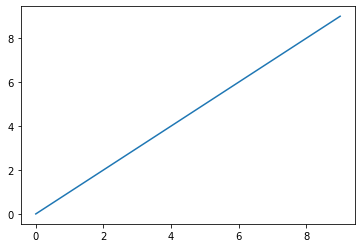

In [3]:
plt.plot(data)

Embora bibliotecas como seaborn e as funções embutidas de
plotagem do pandas lidem com muitos dos detalhes mundanos da
criação de plotagens, caso você precise personalizá-las para além
das opções disponibilizadas pelas funções, será necessário
conhecer um pouco melhor a API da matplotlib.

### Figuras e subplotagens

As plotagens na matplotlib ficam em um objeto *Figure*. Podemos criar
uma nova figura com *plt.figure*:

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

No IPython, uma janela de plotagem vazia aparecerá, mas, no
Jupyter, nada será exibido até que mais alguns comandos sejam
usados. *plt.figure* tem uma série de opções; em especial, *figsize*
garantirá que a figura tenha determinado tamanho e uma razão de
aspecto (aspect ratio) se ela for salva em disco.

Não é possível criar uma plotagem com uma figura em branco. Você
deve criar uma ou mais *subplots* usando *add_subplot*:

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

Essa instrução significa que a figura deve ser de 2 × 2 (portanto até
quatro plotagens no total), e estamos selecionando a primeira das
quatro subplotagens (numeradas a partir de 1). Se você criar as
duas próximas subplotagens, acabará com uma visualização que
tem o aspecto mostrado na Figura Abaixo:

In [6]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

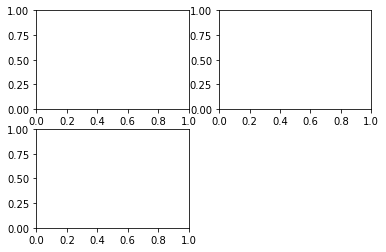

In [7]:
fig

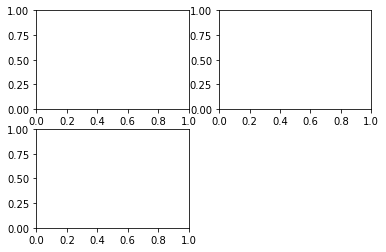

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Quando executamos um comando de plotagem como *plt.plot([1.5, 3.5,
-2, 1.6])*, a matplotlib desenhará na última figura e subplotagem
usadas (criando uma, se for necessário), ocultando, assim, a criação
da figura e da subplotagem. Assim, se adicionarmos o comando a
seguir, teremos algo semelhante à Figura Abaixo:

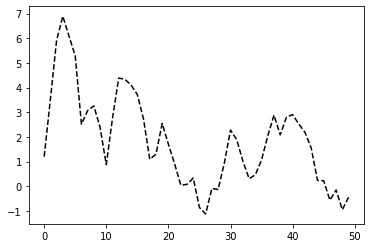

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

O *'k--'* é uma opção de estilo que instrui a matplotlib a plotar uma linha
tracejada preta. Os objetos devolvidos por *fig.add_subplot* nesse caso
são objetos *AxesSubplot*; você pode plotar diretamente nas outras
subplotagens vazias chamando o método de instância de cada uma:

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

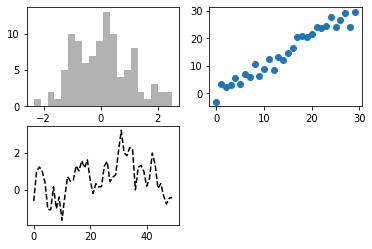

In [11]:
fig

Criar uma figura com uma grade de subplotagens é uma tarefa bem
comum, de modo que a matplotlib inclui um método conveniente,
*plt.subplots*, que cria uma nova figura e devolve um array NumPy
contendo os objetos de subplotagem criados:

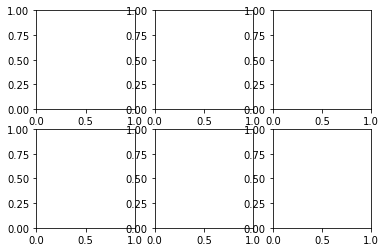

In [12]:
fig, axes = plt.subplots(2, 3)

In [13]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4248699f90>,
      dtype=object)

Isso é muito útil, pois o array axes pode ser facilmente indexado
como um array bidimensional; por exemplo, axes[0, 1] . Também
podemos informar que as subplotagens devem ter os mesmos eixos
x ou y usando sharex e sharey , respectivamente. Isso é
particularmente conveniente se estivermos comparando dados na
mesma escala; caso contrário, a matplotlib definirá automaticamente
uma escala para os limites das plotagens de forma independente.

### Tabela – Opções de pyplot.subplots

Argumento | Descrição
----------|-------------------------
**nrows** | Número de linhas das subplotagens
**ncols** | Número de colunas das subplotagens
**sharex** | Todas as subplotagens devem usar os mesmos tiques no eixo x
|(ajustar o xlim afetará todas as subplotagens)
**sharey** | Todas as subplotagens devem usar os mesmos tiques no eixo y
|(ajustar o ylim afetará todas as subplotagens)
**subplot_kw** | Dicionário de argumentos nomeados passados para a chamada a
|add_subplot para criar cada subplotagem.Argumento
**fig_kw** | nomeados adicionais para subplots são usadas para
|criar a figura, por exemplo, plt.subplots(2, 2, figsize=(8, 6))

### Ajustando o espaçamento em torno das subplotagens

Por padrão, a matplotlib deixa determinado espaço para
preenchimento em torno das subplotagens, além de um
espaçamento entre elas. Todos esses espaçamentos são
especificados em relação à altura e à largura da plotagem, de modo
que, se você redimensionar a plotagem, seja por meio de um
programa ou manualmente usando a janela de GUI, ela se ajustará
dinamicamente. O espaçamento pode ser alterado usando o método
*subplots_adjust* dos objetos *Figure*, também disponível como uma
função de nível superior:


```python
subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
```

*wspace* e *hspace* controlam o percentual da largura e da altura da
figura, respectivamente, a serem usados como espaçamento entre
as subplotagens. Eis um pequeno exemplo em que reduzi o
espaçamento totalmente para zero:



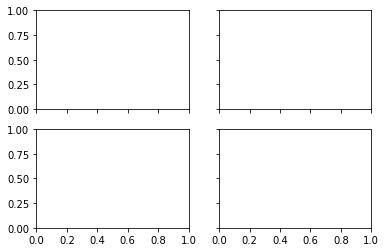

In [14]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [15]:
for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<Figure size 432x288 with 0 Axes>

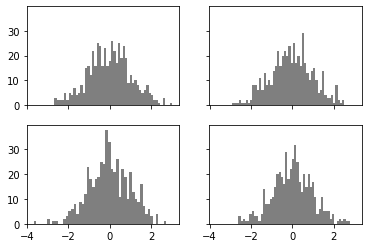

In [16]:
fig

Talvez você tenha notado que há sobreposição entre os rótulos dos
eixos. A matplotlib não verifica se os rótulos se sobrepõem,
portanto, em um caso como esse, será necessário corrigir os rótulos
por conta própria especificando explicitamente os locais dos tiques e
seus rótulos (veremos como fazer isso nas próximas seções).

### Cores, marcadores e estilos de linha

A função principal plot da matplotlib aceita arrays de coordenadas x
e y e, opcionalmente, uma string abreviada informando a cor e o
estilo da linha. Por exemplo, para plotar *x versus y* com traços verdes,
executaríamos:

```python
ax.plot(x, y, 'g--')
```

Essa forma de especificar tanto a cor quanto o estilo da linha em
uma string é oferecida como uma conveniência; na prática, se você
estiver criando plotagens com um programa, talvez prefira não ter
que lidar com strings para criar plotagens com o estilo desejado. A
mesma plotagem também poderia ter sido expressa de modo mais
explícito, assim:

```python
ax.plot(x, y, linestyle='--', color='g')
```

Há uma série de abreviaturas de cores, disponibilizada para cores
comumente usadas, mas podemos utilizar qualquer cor do espectro
especificando o seu código hexa (por exemplo, '#CECECE' ). Veja o
conjunto completo de estilos de linha consultando a docstring de plot
(utilize *plot*? no IPython ou no Jupyter).
Plotagens de linha, além do mais, podem ter *marcadores* para
destacar os pontos de dados propriamente ditos. Como a matplotlib
cria uma plotagem de linha contínua, fazendo uma interpolação
entre os pontos, ocasionalmente talvez não esteja claro onde estão
os pontos. O marcador pode fazer parte da string de estilo, que deve
conter a cor, seguida do tipo de marcador e do estilo da linha:

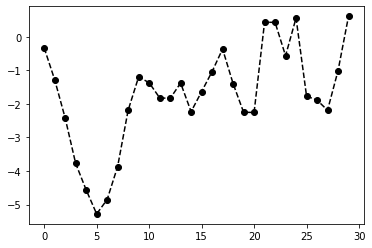

In [17]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

Esse código poderia ter sido escrito mais explicitamente, assim:

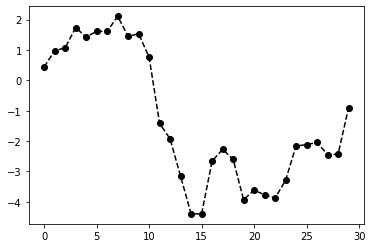

In [18]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

Para plotagens de linha, você perceberá que pontos subsequentes,
por padrão, são interpolados linearmente. Isso pode ser alterado
com a opção *drawstyle*:

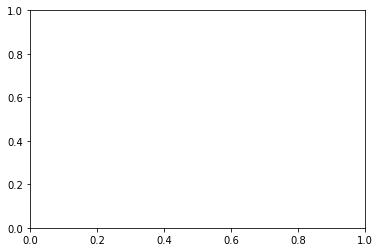

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [20]:
data = np.random.randn(30).cumsum()
data

array([-0.26341144, -0.64027468, -2.38466304, -2.81774923, -4.10236747,
       -6.52118316, -5.59927235, -6.12816232, -4.02303033, -3.81989955,
       -4.30860601, -6.78106411, -6.79172616, -5.35664355, -7.12913193,
       -6.46392528, -5.72790106, -4.85428268, -3.45408715, -3.82198157,
       -3.9155435 , -5.30284616, -6.4898306 , -8.63069458, -8.38325604,
       -7.49305134, -9.25628624, -6.74365988, -5.52603013, -5.12146079])

In [21]:
ax.plot(data, 'k--', label='default')

In [22]:
ax.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

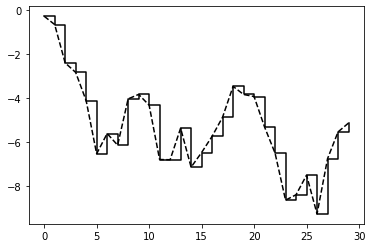

In [23]:
fig

### Tiques, rótulos e legendas
Para a maioria dos tipos de decoração das plotagens, há duas
maneiras principais de proceder: usar a interface procedural *pyplot*
(isto é, *matplotlib.pyplot* ) ou a API nativa da matplotlib, mais orientada a *objetos*.

A interface *pyplot*, projetada para uso interativo, é constituída de
métodos como *xlim*, *xticks* e *xticklabels* . Eles controlam o intervalo da
plotagem, as localizações dos tiques e seus rótulos,
respectivamente. Podem ser usados de duas maneiras.
- Se forem chamados sem argumentos, devolvem o valor atual do
parâmetro (por exemplo, *plt.xlim()* devolve o intervalo atual de
plotagem no eixo x).
- Se forem chamados com parâmetros, definem seus valores (por
exemplo, *plt.xlim([0, 10])* define o intervalo do eixo x como sendo de
0 a 10).

Todos esses métodos atuam no AxesSubplot ativo ou mais
recentemente criado. Cada um deles corresponde a dois métodos
no objeto de subplotagem; no caso de *xlim*, são *ax.get_xlim* e
*ax.set_xlim*. Eu prefiro usar os métodos de instância da subplotagem
para ser mais explícito (e, particularmente, quando trabalho com
várias subplotagens), mas, certamente, você pode usar a opção que
lhe for mais conveniente.

### Definindo o título, os rótulos dos eixos, os tiques e os rótulos dos tiques

Para demonstrar a personalização dos eixos, criarei uma figura
simples e plotarei um passeio aleatório:

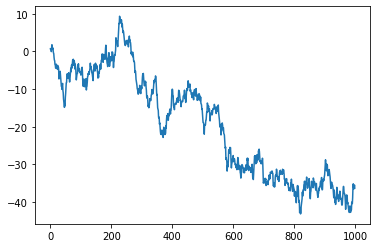

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

Para alterar os tiques do eixo x, a opção mais simples é usar
*set_xticks* e *set_xticklabels*. A primeira instrui a matplotlib acerca do
local para posicionar os tiques no intervalo de dados; por padrão,
esses locais também serão os rótulos. No entanto, podemos definir
qualquer outro valor como rótulos usando *set_xticklabels*:

In [25]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [26]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [27]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [28]:
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

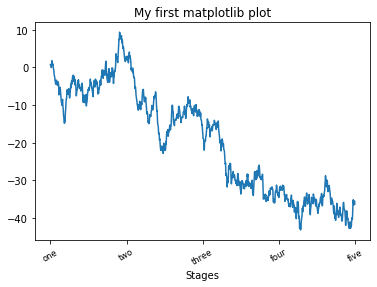

In [29]:
fig

Para modificar o eixo y, o processo é o mesmo, substituindo x por y
no código anterior. A classe dos eixos tem um método *set* que
permite a definição das propriedades de plotagem em lote. No
exemplo anterior, também poderíamos ter escrito:

In [30]:
props = {
    'title': 'My first matplotlib plot 2',
    'xlabel': 'Stages 2'
}
ax.set(**props)

[Text(0.5, 17.200000000000003, 'Stages 2'),
 Text(0.5, 1.0, 'My first matplotlib plot 2')]

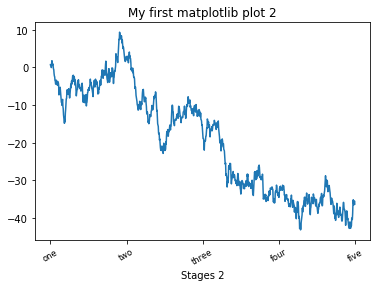

In [31]:
fig

### Acrescentando legendas
As legendas são outro elemento crucial para identificar elementos
da plotagem. Há duas maneiras de adicionar uma legenda. O modo
mais simples é passar o argumento *label* ao adicionar cada parte da
plotagem:

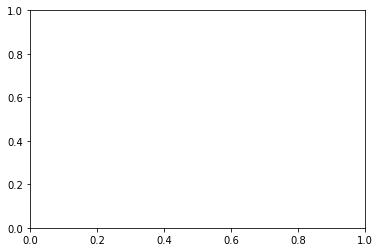

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [33]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

In [34]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

In [35]:
ax.legend(loc='best')

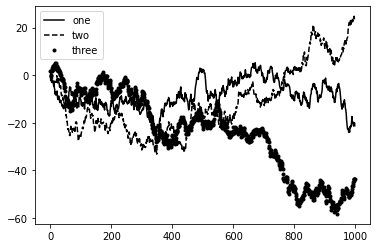

In [36]:
fig

O método *legend* tem várias outras opções para o argumento de
localização *loc*. Consulte a docstring (com *ax.legend?*) para obter mais
informações.
*loc* diz à matplotlib em que local a plotagem deve ser posicionada.
Se você não for excessivamente detalhista, *'best'* será uma boa
opção, pois ele escolherá uma localização que atrapalhe menos.
Para excluir um ou mais elementos da legenda, não passe nenhum
rótulo ou passe *label='\_nolegend\_'*.

### Anotações e desenhos em uma subplotagem
Além dos tipos padrões de plotagem, talvez você queira desenhar
suas próprias anotações na plotagem, que poderiam ser compostas de textos, setas ou outras formas. É possível adicionar anotações e
textos usando as funções *text*, *arrow* e *annotate*. A função *text* desenha
um texto nas coordenadas especificadas (x, y) da plotagem, com
uma estilização personalizada opcional:

```python
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
```

As anotações podem incluir tanto texto quanto setas, organizados
de modo apropriado. Como exemplo, vamos plotar os preços de
fechamento do índice S&P 500 a partir de 2007 (obtidos do Yahoo!
Finance), e fazer anotações com algumas das datas importantes da
crise financeira de 2008 a 2009. Você pode reproduzir facilmente
esse código de exemplo, em sua maior parte, em uma única célula
de um notebook Jupyter

In [37]:
import pandas as pd
from datetime import datetime

In [38]:
path = '/content/drive/MyDrive/Análise de Dados/CSVs e TXTs/spx.csv'

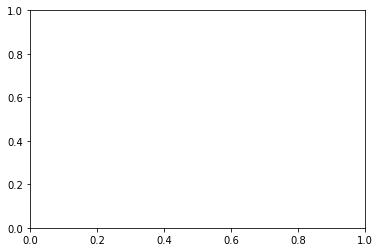

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [40]:
data = pd.read_csv(path, index_col=0, parse_dates=True)
spx = data['SPX']

In [41]:
spx.plot(ax=ax, style='k-')

In [42]:
criss_data = [
              (datetime(2007, 10, 11), 'Peak of bull market'),
              (datetime(2008, 3, 12), 'Bear Streans Fails'),
              (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [43]:
for date, label in criss_data:
  ax.annotate(label, xy=(date, spx.asof(date) + 75),
              xytext=(date, spx.asof(date) + 255),
              arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
              horizontalalignment='left', verticalalignment='top')

In [44]:
# Faz um zoom no período de 2007 a 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])

(732677.0, 734138.0)

In [45]:
ax.set_ylim([600, 1800])

(600.0, 1800.0)

In [46]:
ax.set_title('Important dates in the 2008-1009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-1009 financial crisis')

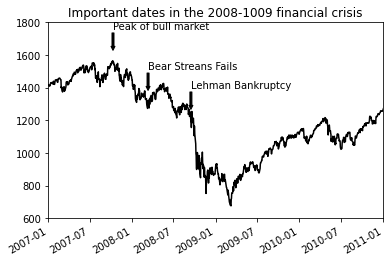

In [47]:
fig

Há alguns pontos importantes a serem enfatizados nessa plotagem:
o método *ax.annotate* é capaz de desenhar rótulos nas coordenadas x
e y indicadas. Usamos os métodos *set_xlim* e *set_ylim* para definir
manualmente as fronteiras de início e de fim da plotagem, em vez
de usar o default da matplotlib. Por fim, *ax.set_title* adiciona um título principal à plotagem.

Consulte a galeria online da matplotlib para ver muitos outros
exemplos de anotações e aprender com eles.

Desenhar formas exige um pouco mais de cuidado. A matplotlib tem
objetos que representam muitas formas comuns, conhecidas como
*patches*. Algumas delas, como *Rectangle* e *Circle*, se encontram em
*matplotlib.pyplot*, mas o conjunto completo está em *matplotlib.patches*.

Para adicionar uma forma à plotagem, crie o objeto patch *shp* e
adicione-o a uma subplotagem chamando *ax.add_patch(shp)*:

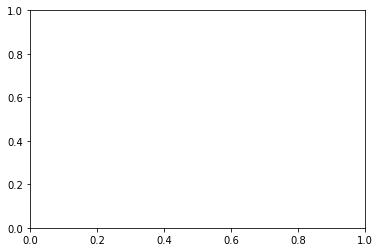

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [49]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgno = plt.Polygon([[0.15, 0.15],[0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

In [50]:
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgno)

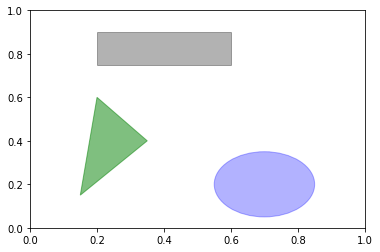

In [51]:
fig

Se observar a implementação de muitos tipos de plotagem
familiares, você verá que eles são compostos de patches.

### Salvando plotagens em arquivos

Podemos salvar a figura ativa em um arquivo usando *plt.savefig*. Esse
método é equivalente ao método de instância *savefig* do objeto que
representa a figura. Por exemplo, para salvar uma versão SVG de
uma figura, basta digitar:

```python
plt.savefig('figpath.svg')
```

O tipo do arquivo é inferido a partir de sua extensão. Portanto, se
você usou *.pdf*, terá um PDF. Há duas opções importantes que uso
com frequência para gráficos que serão publicados: *dpi*, que controla
a resolução em pontos por polegada, e *bbox_inches*, que pode
remover espaços em branco em torno da figura. Para obter a
mesma plotagem como um PNG com um mínimo de espaços embranco em torno da plotagem e com 400 DPI, poderíamos usar o
seguinte:

```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

*savefig* não precisa escrever em disco; ele também pode escrever
em qualquer objeto do tipo arquivo, como BytesIO:

```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```


### Tabela – Opções de figure.savefig
Argumento | Descrição
----------|---------------------------
**fname** | String contendo um path de arquivo ou um objeto Python do tipo
|arquivo. O formato da figura é inferido a partir da extensão do
|arquivo (por exemplo, .pdf para PDF ou .png para PNG)
**dpi** | É a resolução da figura em pontos por polegada; o default é 100,
|mas pode ser configurado
**facecolor, edgecolor** | Cor do plano de fundo da figura, fora das subplotagens; o default é
|'w' (branco)
**format** | Formato de arquivo explícito a ser usado ('png', 'pdf', 'svg', 'ps',
|'eps', ...)
**bbox_inches** | Parte da figura a ser salva; se 'tight' for especificado, tentará
|remover o espaço vazio em torno da figura

### Configuração da matplotlib

A matplotlib vem configurada com esquemas de cores e defaults
visando principalmente à preparação das figuras para publicação.
Felizmente quase todo o comportamento default pode ser
personalizado por meio de um conjunto amplo de parâmetros
globais que determinam o tamanho da figura, o espaçamento das
subplotagens, as cores, os tamanhos das fontes, os estilos de grade
e assim por diante. Uma forma de modificar a configuração por meio
de um programa Python é usar o método *rc*; por exemplo, paradefinir o tamanho default da figura globalmente como 10 × 10,
poderíamos usar o seguinte:

```python
plt.rc('figure', figsize=(10, 10))
```

O primeiro argumento de *rc* é o componente que desejamos
personalizar, como *'figure' , 'axes' , 'xtick' , 'ytick' , 'grid' , 'legend'* ou vários
outros. Depois disso, pode haver uma sequência de argumentos
nomeados informando os novos parâmetros. Uma maneira fácil de
escrever as opções em seu programa é na forma de um dicionário:

```python
font_options = {'family' : 'monospace',
'weight' : 'bold',
'size' : 'small'}

plt.rc('font', **font_options)
```


Para uma personalização mais extensa e para ver uma lista de
todas as opções, a matplotlib vem com um arquivo de configuração
*matplotlibrc* no diretório *matplotlib/mpl-data*. Se esse arquivo for
personalizado e colocado em seu diretório home chamado
*.matplotlibrc*, ele será carregado sempre que você usar a matplotlib.
Conforme veremos na próxima seção, o pacote seaborn tem vários
temas de plotagem embutidos, ou *estilos*, que utilizam o sistema de
configuração da matplotlib internamente.

### Plottagem com o pandas e o seaborn

### Plotagens de linha

Tanto Series quanto DataFrame têm um atributo plot para criar
alguns tipos básicos de plotagem. Por padrão, *plot()* cria plotagens
de linha:

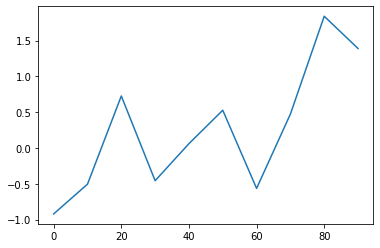

In [53]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

O índice do objeto Series é passado para a matplotlib para plotagem
no eixo x, embora você possa desativar isso especificando
*use_index=False*. Os tiques e os limites do eixo x podem ser ajustados
com as opções *xticks* e *xlim*, e os do eixo y respectivamente com
*yticks* e *ylim*. Veja a Tabela Abaixo que apresenta uma lista completa das opções de *plot*.

A maioria dos métodos de plotagem do pandas aceita um parâmetro
*ax* opcional, que pode ser um objeto de subplotagem da matplotlib.
Isso permite um posicionamento mais flexível das subplotagens em
um layout de grade.

O método *plot* de DataFrame plota cada uma de suas colunas como
uma linha diferente na mesma subplotagem, criando uma legenda
automaticamente:

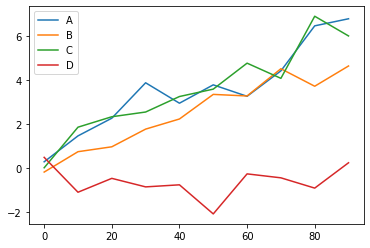

In [56]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

O atributo *plot* contém uma “família” de métodos para diferentes tipos
de plotagem. Por exemplo, *df.plot()* é equivalente a
*df.plot.line()*.Exploraremos alguns desses métodos a seguir.

OBS: *Argumentos nomeados adicionais para plot são passados para a
respectiva função de plotagem da matplotlib, de modo que você poderá
personalizar melhor essas plotagens se conhecer melhor a API da
matplotlib.*

### Tabela – Argumentos do método Series.plot

Argumento | Descrição
----------|----------------------
**label** | Rótulo para a legenda da plotagem
**ax** | Objeto de plotagem da matplotlib para a plotagem; se nada for
|especificado, utiliza a subplotagem ativa da matplotlib
**style** | String de estilo, por exemplo, 'ko--', a ser passada para a matplotlib
**alpha** | A opacidade de preenchimento (de 0 a 1) da plotagem
**kind** | Pode ser 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
**logy** | Usa escala logarítmica no eixo y
**use_index** | Usa o índice do objeto para rótulos dos tiques
**rot** | Rotação dos rótulos dos tiques (de 0 a 360)
**xticks** | Valores a serem usados como os tiques no eixo x
**yticks** | Valores a serem usados como os tiques no eixo y
**xlim** | Limites no eixo x (por exemplo, [0, 10])
**ylim** | Limites no eixo y
**grid** | Exibe grade do eixo (o default é ativo)

O DataFrame tem uma série de opções que permitem ter certa dose
de flexibilidade quanto ao modo como as colunas são tratadas; por
exemplo, se elas devem ser todas plotadas na mesma subplotagem
ou se subplotagens diferentes devem ser criadas. Veja a Tabela Abaixo
que apresenta mais informações sobre elas.

### Tabela – Argumentos de plotagem específicos para DataFrame

Argumento | Descrição
----------|------------------
**subplots** | Plota cada coluna do DataFrame em uma subplotagem separada
**sharex** | Se subplots=True, compartilha o mesmo eixo x, ligando os tiques
|e os limites
**sharey** | Se subplots=True, compartilha o mesmo eixo y
**figsize** | Tamanho da figura a ser criada, na forma de uma tupla
**title** | Título da plotagem como uma string
**legend** | Adiciona uma legenda para a subplotagem (o default é True)
**sort_columns** | Plota colunas em ordem alfabética; por padrão, utiliza a ordem
|presente nas colunas

### Plotagem de barras
*plot.bar()* e *plot.barh()* criam plotagens de barra vertical e horizontal,
respectivamente. Nesse caso, o índice de Series ou de DataFrame
será usado como os tiques de x (*bar*) ou de y (*barh*):

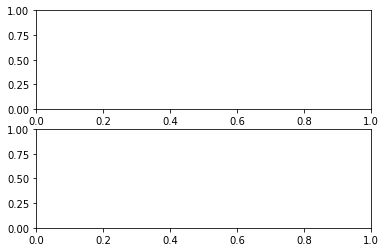

In [57]:
fig, axes = plt.subplots(2, 1)

In [58]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [59]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [60]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

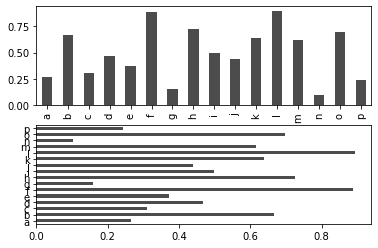

In [61]:
fig

As opções *color='k'* e *alpha=0.7* definem a cor das plotagens como
preto e o uso de transparência parcial para o preenchimento.

Com um DataFrame, as plotagens de barra agrupam os valores de
cada linha em um grupo de barras, lado a lado, para cada valor.

In [62]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.448014,0.042816,0.327254,0.162325
two,0.202939,0.253798,0.928516,0.437089
three,0.664085,0.601384,0.026942,0.582392
four,0.626734,0.902057,0.155951,0.235412
five,0.926738,0.064865,0.107820,0.650115
six,0.960048,0.374608,0.414114,0.242774


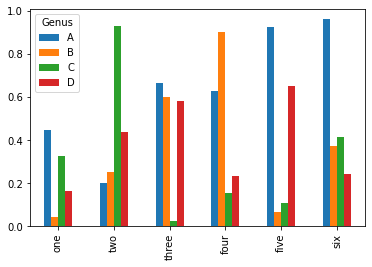

In [63]:
df.plot.bar()

Observe que o nome “Genus” das colunas do DataFrame é usado
como título da legenda.

Criamos plotagens de barras empilhadas a partir de um DataFrame
passando *stacked=True*; como resultado, o valor de cada linha será
empilhado:

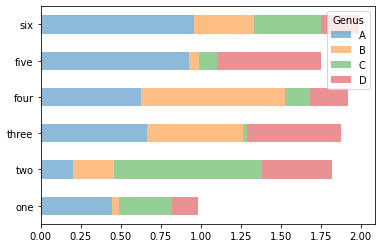

In [65]:
df.plot.barh(stacked=True, alpha=0.5)

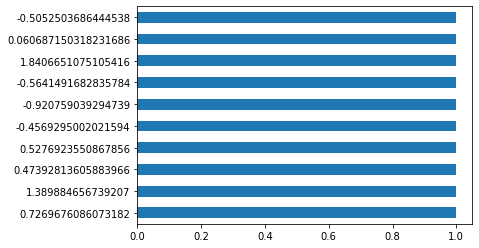

In [68]:
s.value_counts().plot.barh()

OBS: *Uma receita útil para plotagens de barra consiste em visualizar a
frequência de valores de uma Series usando value_counts:
s.value_counts().plot.bar().*

Voltando ao conjunto de dados de gorjetas usado antes no livro,
suponha que quiséssemos gerar uma plotagem de barras
empilhadas que exibisse o percentual de pontos de dados para cada
tamanho de grupo a cada dia. Carregarei os dados usando *read_csv*
e farei uma tabulação cruzada por dia e por tamanho de grupo:

In [69]:
path = '/content/drive/MyDrive/Análise de Dados/CSVs e TXTs/tips.csv'
tips = pd.read_csv(path)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [70]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [71]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Então farei uma normalização de modo que a soma de cada linha
seja 1 e farei a plotagem:

In [74]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


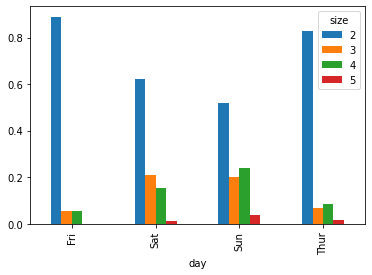

In [75]:
party_pcts.plot.bar()

Assim, podemos ver que os tamanhos dos grupos parecem
aumentar no final de semana nesse conjunto de dados.

Com dados que exijam agregação ou resumo antes da criação de
uma plotagem, usar o pacote *seaborn* pode simplificar bastante.

In [76]:
import seaborn as sns

In [77]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


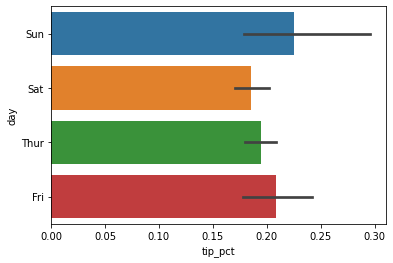

In [78]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

As funções de plotagem do seaborn aceitam um argumento *data*,
que pode ser um DataFrame do pandas. Os outros argumentos
referem-se aos nomes das colunas. Pelo fato de haver várias
observações para cada valor em *day*, as barras são o valor médio de
*tip_pct*. As linhas pretas desenhadas nas barras representam o
intervalo de confiança de 95% (isso pode ser configurado com
argumentos opcionais).

*seaborn.barplot* tem uma opção hue que nos permite fazer uma
separação por meio de um valor adicional de categoria:


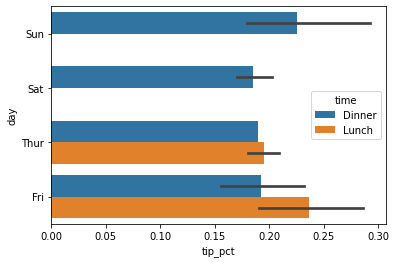

In [79]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Observe que o seaborn alterou automaticamente a estética das
plotagens: a paleta de cores default, o plano de fundo da plotagem e
as cores das linhas da grade. Podemos alternar entre diferentes
aparências para a plotagem usando *seaborn.set*:

```python
sns.set(style="whitegrid")
```

### Histogramas e plotagens de densidade

Um histograma é um tipo de plotagem de barras que oferece uma
exibição discreta das frequências dos valores. Os pontos de dados
são separados em compartimentos (bins) discretos, uniformemente
espaçados, e o número de pontos de dados em cada compartimento
é plotado. Usando os dados de gorjeta anteriores, podemos gerar
um histograma das porcentagens de gorjetas sobre o total das
contas usando o método *plot.hist* na Series:

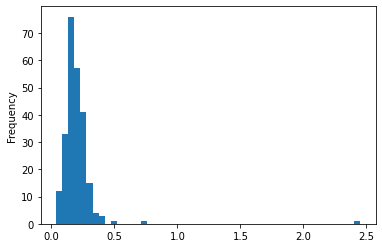

In [80]:
tips['tip_pct'].plot.hist(bins=50)

Um tipo relacionado de plotagem é uma *plotagem de densidade*,
formada pelo cálculo de uma estimativa de uma distribuição
contínua de probabilidades que possa ter gerado os dados
observados. O procedimento usual consiste em fazer uma
aproximação dessa distribuição como uma mistura de “kernels” –isto é, de distribuições mais simples, como a distribuição normal.
Assim, as plotagens de densidade também são conhecidas como
plotagens KDE (Kernel Density Estimate, ou Estimativa de
Densidade Kernel).

O uso de *plot.kde* gera uma plotagem de densidade que utiliza a
estimativa convencional de combinação-de-normais:

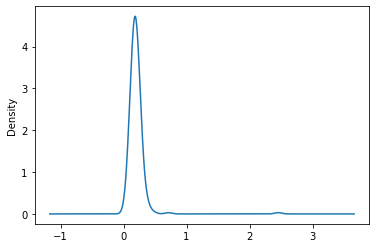

In [81]:
tips['tip_pct'].plot.density()

O seaborn gera histogramas e plotagens de densidade mais
facilmente ainda com o método *distplot*, capaz de plotar tanto um
histograma quanto uma estimativa de densidade contínua
simultaneamente. Como exemplo, considere uma distribuição
bimodal constituída de amostras de duas distribuições normais
padrões distintas:

In [85]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

In [86]:
values = pd.Series(np.concatenate([comp1, comp2]))

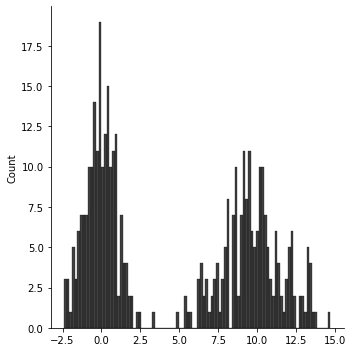

In [87]:
sns.displot(values, bins=100, color='k')

### Plotagens de dispersão ou de pontos

Plotagens de pontos ou de dispersão podem ser uma maneira
conveniente de analisar o relacionamento entre duas séries de
dados unidimensionais. Por exemplo, carregaremos a seguir o
conjunto de dados *macrodata* do projeto statsmodels, selecionaremos
algumas variáveis e então calcularemos as diferenças de log:

In [97]:
path = '/content/drive/MyDrive/Análise de Dados/CSVs e TXTs/macrodata.csv'
macro = pd.read_csv(path, delimiter=',')
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [98]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [99]:
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Podemos então usar o método *regplot* do seaborn, que gera uma
plotagem de dispersão e inclui um traço de regressão linear:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

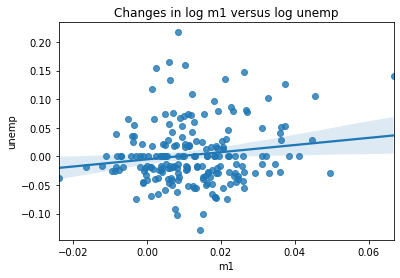

In [101]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title("Changes in log %s versus log %s"%('m1', 'unemp'))

Na análise exploratória de dados, é conveniente observar todas as
plotagens de dispersão entre um grupo de variáveis; isso é
conhecido como *plotagem de pares* ou uma *matriz de plotagem dedispersão*.
Fazer uma plotagem como essa a partir do zero exige um
pouco de trabalho; desse modo, o seaborn tem uma função *pairplot*
conveniente, que aceita colocar histogramas ou estimativas de
densidade de cada variável ao longo da diagonal:

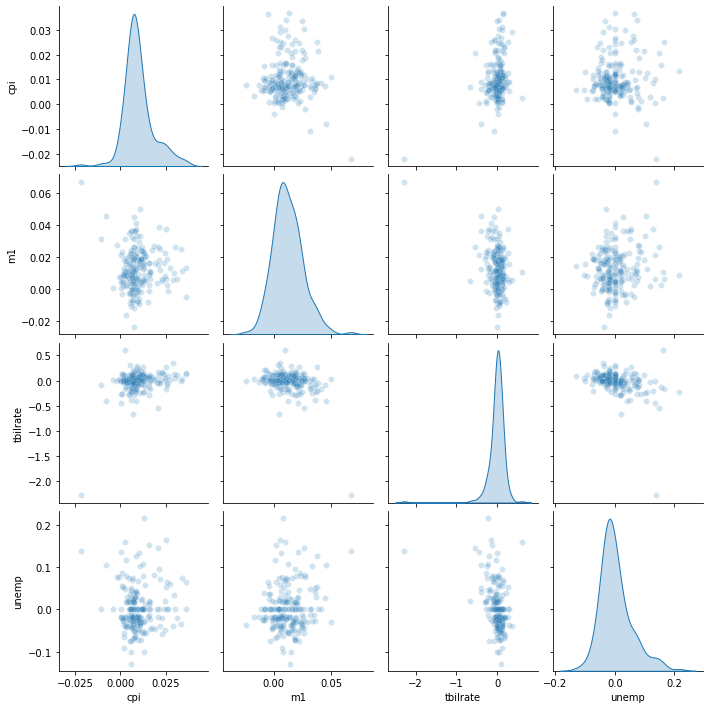

In [102]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

Talvez você tenha notado o argumento *plot_kws*. Ele permite passar
opções de configuração para as chamadas de plotagem individuais
nos elementos fora da diagonal. Consulte a docstring de
seaborn.pairplot para ver as opções de configuração mais específicas.

### Grades de faceta e dados de categoria

E quanto aos conjuntos de dados para os quais temos dimensões
de agrupamento adicionais? Uma forma de visualizar dados com
muitas variáveis de categoria é por meio de uma *grade de faceta* (facet
grid). O seaborn tem uma função embutida *factorplot* conveniente,
que simplifica a criação de vários tipos de plotagem com facetas:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


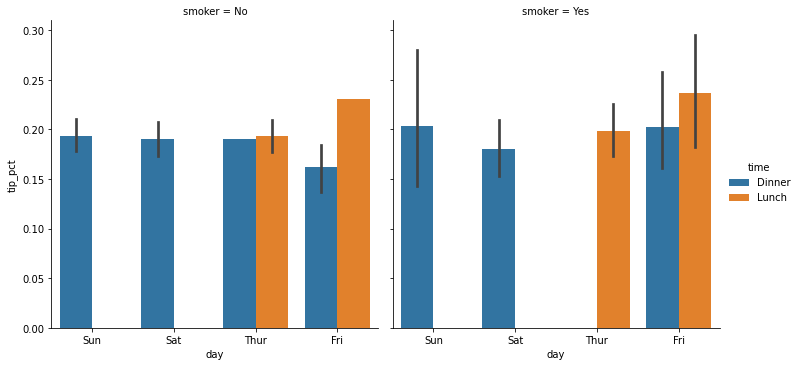

In [103]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

Em vez de agrupar por *'time'* por cores diferentes de barra em uma
faceta, podemos também expandir a grade de facetas
acrescentando uma linha por valor de *time*:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


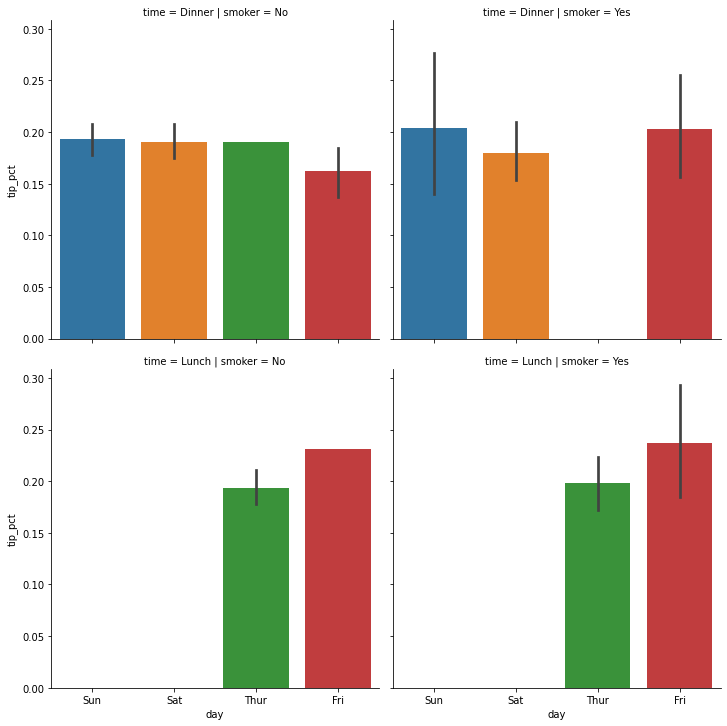

In [104]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

*factorplot* aceita outros tipos de plotagem que podem ser úteis,
dependendo do que você estiver tentando exibir. Por exemplo,
plotagens de caixa (que mostram a mediana, os quartis e os valores
discrepantes) podem ser um tipo de visualização eficaz:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


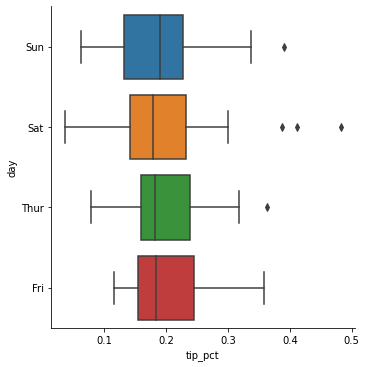

In [105]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

Você pode criar suas próprias plotagens de grade de facetas usando
a classe mais genérica *seaborn.FacetGrid*. Consulte a documentação
do seaborn ( https://seaborn.pydata.org/ ) para obter mais informações.